<a href="https://colab.research.google.com/github/Acabacalle79/Proyecto1/blob/main/Copia_de_Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargamos librerias
!pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Cargamos el archivo CSV
df = pd.read_csv("university_student_data.csv")

# Para ver las primeras filas
df.head()


,Year,Term,Applications,Admitted,Enrolled,Retention Rate (%),Student Satisfaction (%),Engineering Enrolled,Business Enrolled,Arts Enrolled,Science Enrolled
0,2015,Spring,2500,1500,600,85,78,200,150,125,125
1,2015,Fall,2500,1500,600,85,78,200,150,125,125
2,2016,Spring,2600,1550,625,86,79,210,160,130,125
3,2016,Fall,2600,1550,625,86,79,210,160,130,125
4,2017,Spring,2700,1600,650,87,80,225,165,135,125


In [ ]:
# Información general
df.info()

# Estadísticas básicas
df.describe()

# Columnas
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      20 non-null     int64 
 1   Term                      20 non-null     object
 2   Applications              20 non-null     int64 
 3   Admitted                  20 non-null     int64 
 4   Enrolled                  20 non-null     int64 
 5   Retention Rate (%)        20 non-null     int64 
 6   Student Satisfaction (%)  20 non-null     int64 
 7   Engineering Enrolled      20 non-null     int64 
 8   Business Enrolled         20 non-null     int64 
 9   Arts Enrolled             20 non-null     int64 
 10  Science Enrolled          20 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.8+ KB


Index(['Year', 'Term', 'Applications', 'Admitted', 'Enrolled',
       'Retention Rate (%)', 'Student Satisfaction (%)',
       'Engineering Enrolled', 'Business Enrolled', 'Arts Enrolled',
       'Science Enrolled'],
      dtype='object')

In [ ]:
#para ver los nombres de las columnas
df.columns


Index(['Year', 'Term', 'Applications', 'Admitted', 'Enrolled',
       'Retention Rate (%)', 'Student Satisfaction (%)',
       'Engineering Enrolled', 'Business Enrolled', 'Arts Enrolled',
       'Science Enrolled'],
      dtype='object')

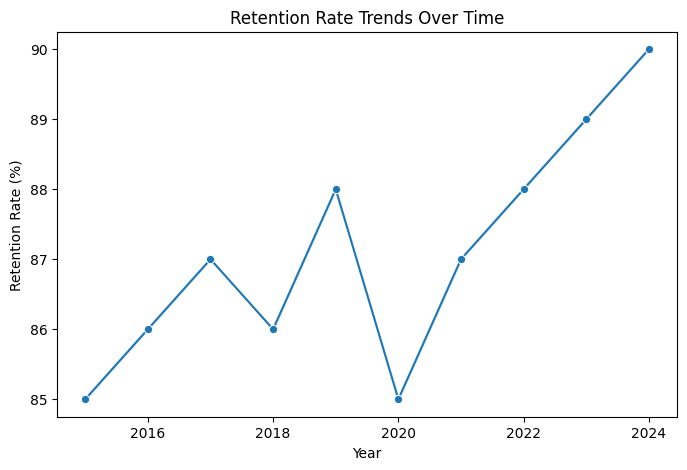

In [ ]:
#Grafica Retention rate trends over time
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="Year", y="Retention Rate (%)", marker="o")
plt.title("Retention Rate Trends Over Time")
plt.ylabel("Retention Rate (%)")
plt.show()


/tmp/ipython-input-82882156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Year", y="Student Satisfaction (%)", palette="coolwarm")


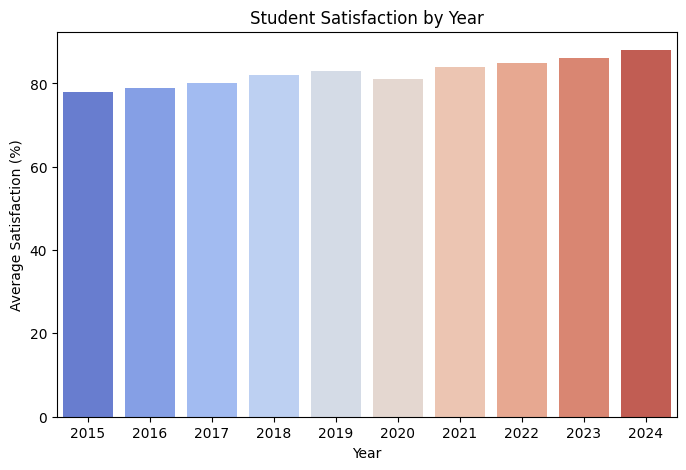

In [ ]:
#Grafica student satisfaction scores by year
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Year", y="Student Satisfaction (%)", palette="coolwarm")
plt.title("Student Satisfaction by Year")
plt.ylabel("Average Satisfaction (%)")
plt.xlabel("Year")
plt.show()


/tmp/ipython-input-2054482805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Term", y="Retention Rate (%)", palette="Set2")


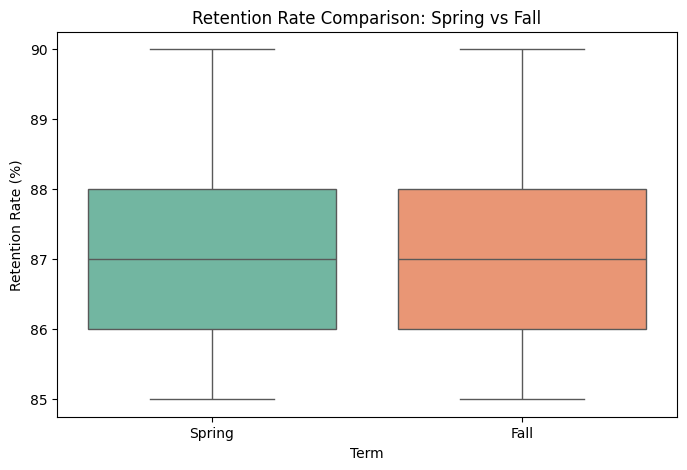

In [ ]:
#Grafica Comparison between Spring and Fall terms
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Term", y="Retention Rate (%)", palette="Set2")
plt.title("Retention Rate Comparison: Spring vs Fall")
plt.ylabel("Retention Rate (%)")
plt.xlabel("Term")
plt.show()


In [ ]:
#Agrupacion de datos para anlisis
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Retention Rate (%)"] = df["Retention Rate (%)"].astype(str).str.replace('%','', regex=False).astype(float)
df["Student Satisfaction (%)"] = df["Student Satisfaction (%)"].astype(str).str.replace('%','', regex=False).astype(float)


retention_year = df.groupby("Year")["Retention Rate (%)"].mean().reset_index()
satisfaction_year = df.groupby("Year")["Student Satisfaction (%)"].mean().reset_index()
term_comparison = df.groupby("Term")["Retention Rate (%)"].mean().reset_index()

# Mostrar resultados
print(retention_year.head())
print(satisfaction_year.head())
print(term_comparison.head())



   Year  Retention Rate (%)
0  2015                85.0
1  2016                86.0
2  2017                87.0
3  2018                86.0
4  2019                88.0
   Year  Student Satisfaction (%)
0  2015                      78.0
1  2016                      79.0
2  2017                      80.0
3  2018                      82.0
4  2019                      83.0
     Term  Retention Rate (%)
0    Fall                87.1
1  Spring                87.1
